In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multimodal Prompting with Gemini 1.5: Image based prompts

<table align="left">
<td style="text-align: center">
<a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/gemini/prompting_recipes/multimodal/multimodal_prompting_image.ipynb">
<img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
</a>
</td>
      <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fgemini%2Fprompting_recipes%2Fmultimodal%2Fmultimodal_prompting_image.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
<td style="text-align: center">
<a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/gemini/prompting_recipes/multimodal/multimodal_prompting_image.ipynb">
<img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
</a>
</td>    
<td style="text-align: center">
<a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/gemini/prompting_recipes/multimodal/multimodal_prompting_image.ipynb">
<img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
</a>
</td>
</table>

| | |
|-|-|
| Author(s) | [Michael Chertushkin](https://github.com/misha-chertushkin) |
| Reviewer(s) | [Rajesh Thallam](https://github.com/rthallam), [Skander Hannachi](https://github.com/skanderhn)  |
| Last updated | 2024-09-16 |

# Overview

---

Gemini 1.5 Pro and Flash models supports adding image, audio, video, and PDF files in text or chat prompts for a text or code response. Gemini 1.5 Pro supports up to 2 Million input tokens with up to 7200 images per prompt. You can add images to Gemini requests to perform [image understanding tasks](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/image-understanding) such as image captioning, visual question and answering, comparing images, object or text detection and more. 

---

In this notebook we cover prompting recipes and strategies for working with Gemini on image files and show examples on the way. This notebook is organized as follows:

- Image Understanding
- Using system instruction
- Structuring prompt with images
- Adding few-shot examples the image prompt
- Document understanding
- Math understanding

<div class="alert alert-block alert-info">
This notebook does not cover image generation task. <a href="https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview">Imagen on Vertex AI</a> lets you quickly generate high-quality images from simple text descriptions. Refer to this notebook for <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb">image generation</a>.
</div>

# Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com).

## Google Cloud Permissions

**To run the complete Notebook, including the optional section, you will need to have the [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project.**

If you want to skip the optional section, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access):
* **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
* **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
* **`roles/aiplatform.user`** to use AI Platform components
* **`roles/storage.objectAdmin`** to modify and delete GCS buckets

## Install Vertex AI SDK for Python and other dependencies (If Needed)

The list `packages` contains tuples of package import names and install names. If the import name is not found then the install name is used to install quitely for the current user.## Install Vertex AI SDK for Python and other dependencies (If Needed)

The list `packages` contains tuples of package import names and install names. If the import name is not found then the install name is used to install quitely for the current user.

In [ ]:
! pip install google-cloud-aiplatform --upgrade --quiet --user

## Restart Runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [ ]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()
    print("Authenticated")

## Set Google Cloud project information and Initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

Make sure to change `PROJECT_ID` in the next cell. You can leave the values for `REGION` unless you have a specific reason to change them.

In [1]:
import vertexai

PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
PROJECT_ID = "rthallam-demo-project"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}

vertexai.init(project=PROJECT_ID, location=REGION)
print("Vertex AI SDK initialized.")
print(f"Vertex AI SDK version = {vertexai.__version__}")

Vertex AI SDK initialized.
Vertex AI SDK version = 1.65.0


## Import Libraries

In [3]:
from vertexai.generative_models import (GenerativeModel, HarmBlockThreshold,
                                        HarmCategory, Image, Part)

## Define Utility functions

In [4]:
import http.client
import textwrap
import typing
import urllib.request

from google.cloud import storage
from IPython import display
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


def wrap(string, max_width=80):
    return textwrap.fill(string, max_width)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def get_image_bytes_from_gcs(gcs_path: str):
    bucket_name = gcs_path.split("/")[2]
    object_prefix = "/".join(gcs_path.split("/")[3:])
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.get_blob(object_prefix)
    return blob.download_as_bytes()


def display_image(image_url: str, width: int = 300, height: int = 200):
    if image_url.startswith("gs://"):
        image_bytes = get_image_bytes_from_gcs(image_url)
    else:
        image_bytes = get_image_bytes_from_url(image_url)
    display.display(display.Image(data=image_bytes, width=width, height=height))


def print_prompt(contents: list[str | Image | Part]):
    for content in contents:
        if isinstance(content, Part):
            if content.mime_type.startswith("image"):
                display_image(image_url=content.file_data.file_uri)
            else:
                print(content)
        else:
            print(content)

## Initialize Gemini

In [5]:
# Gemini Config
GENERATION_CONFIG = {
    "max_output_tokens": 8192,
    "temperature": 0.1,
    "top_p": 0.95,
}

SAFETY_CONFIG = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_ONLY_HIGH,
}

gemini_pro = GenerativeModel(model_name="gemini-1.5-pro-001")
gemini_flash = GenerativeModel(model_name="gemini-1.5-flash-001")
image_path_prefix = (
    "gs://public-aaie-genai-samples/gemini/prompting_recipes/multimodal/images"
)


def generate(
    model,
    contents,
    safety_settings=SAFETY_CONFIG,
    generation_config=GENERATION_CONFIG,
    as_markdown=False,
):
    responses = model.generate_content(
        contents=contents,
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=False,
    )
    if isinstance(responses, list):
        for response in responses:
            if as_markdown:
                display.display(display.Markdown(response.text))
            else:
                print(wrap(response.text), end="")
    else:
        if as_markdown:
            display.display(display.Markdown(responses.text))
        else:
            print(wrap(responses.text), end="")

# Prompt #1. Image Understanding

This task requires the input to be presented in two different modalities: text and image. The example of the API call is below, however this is non-optimal prompt and we can make it better.

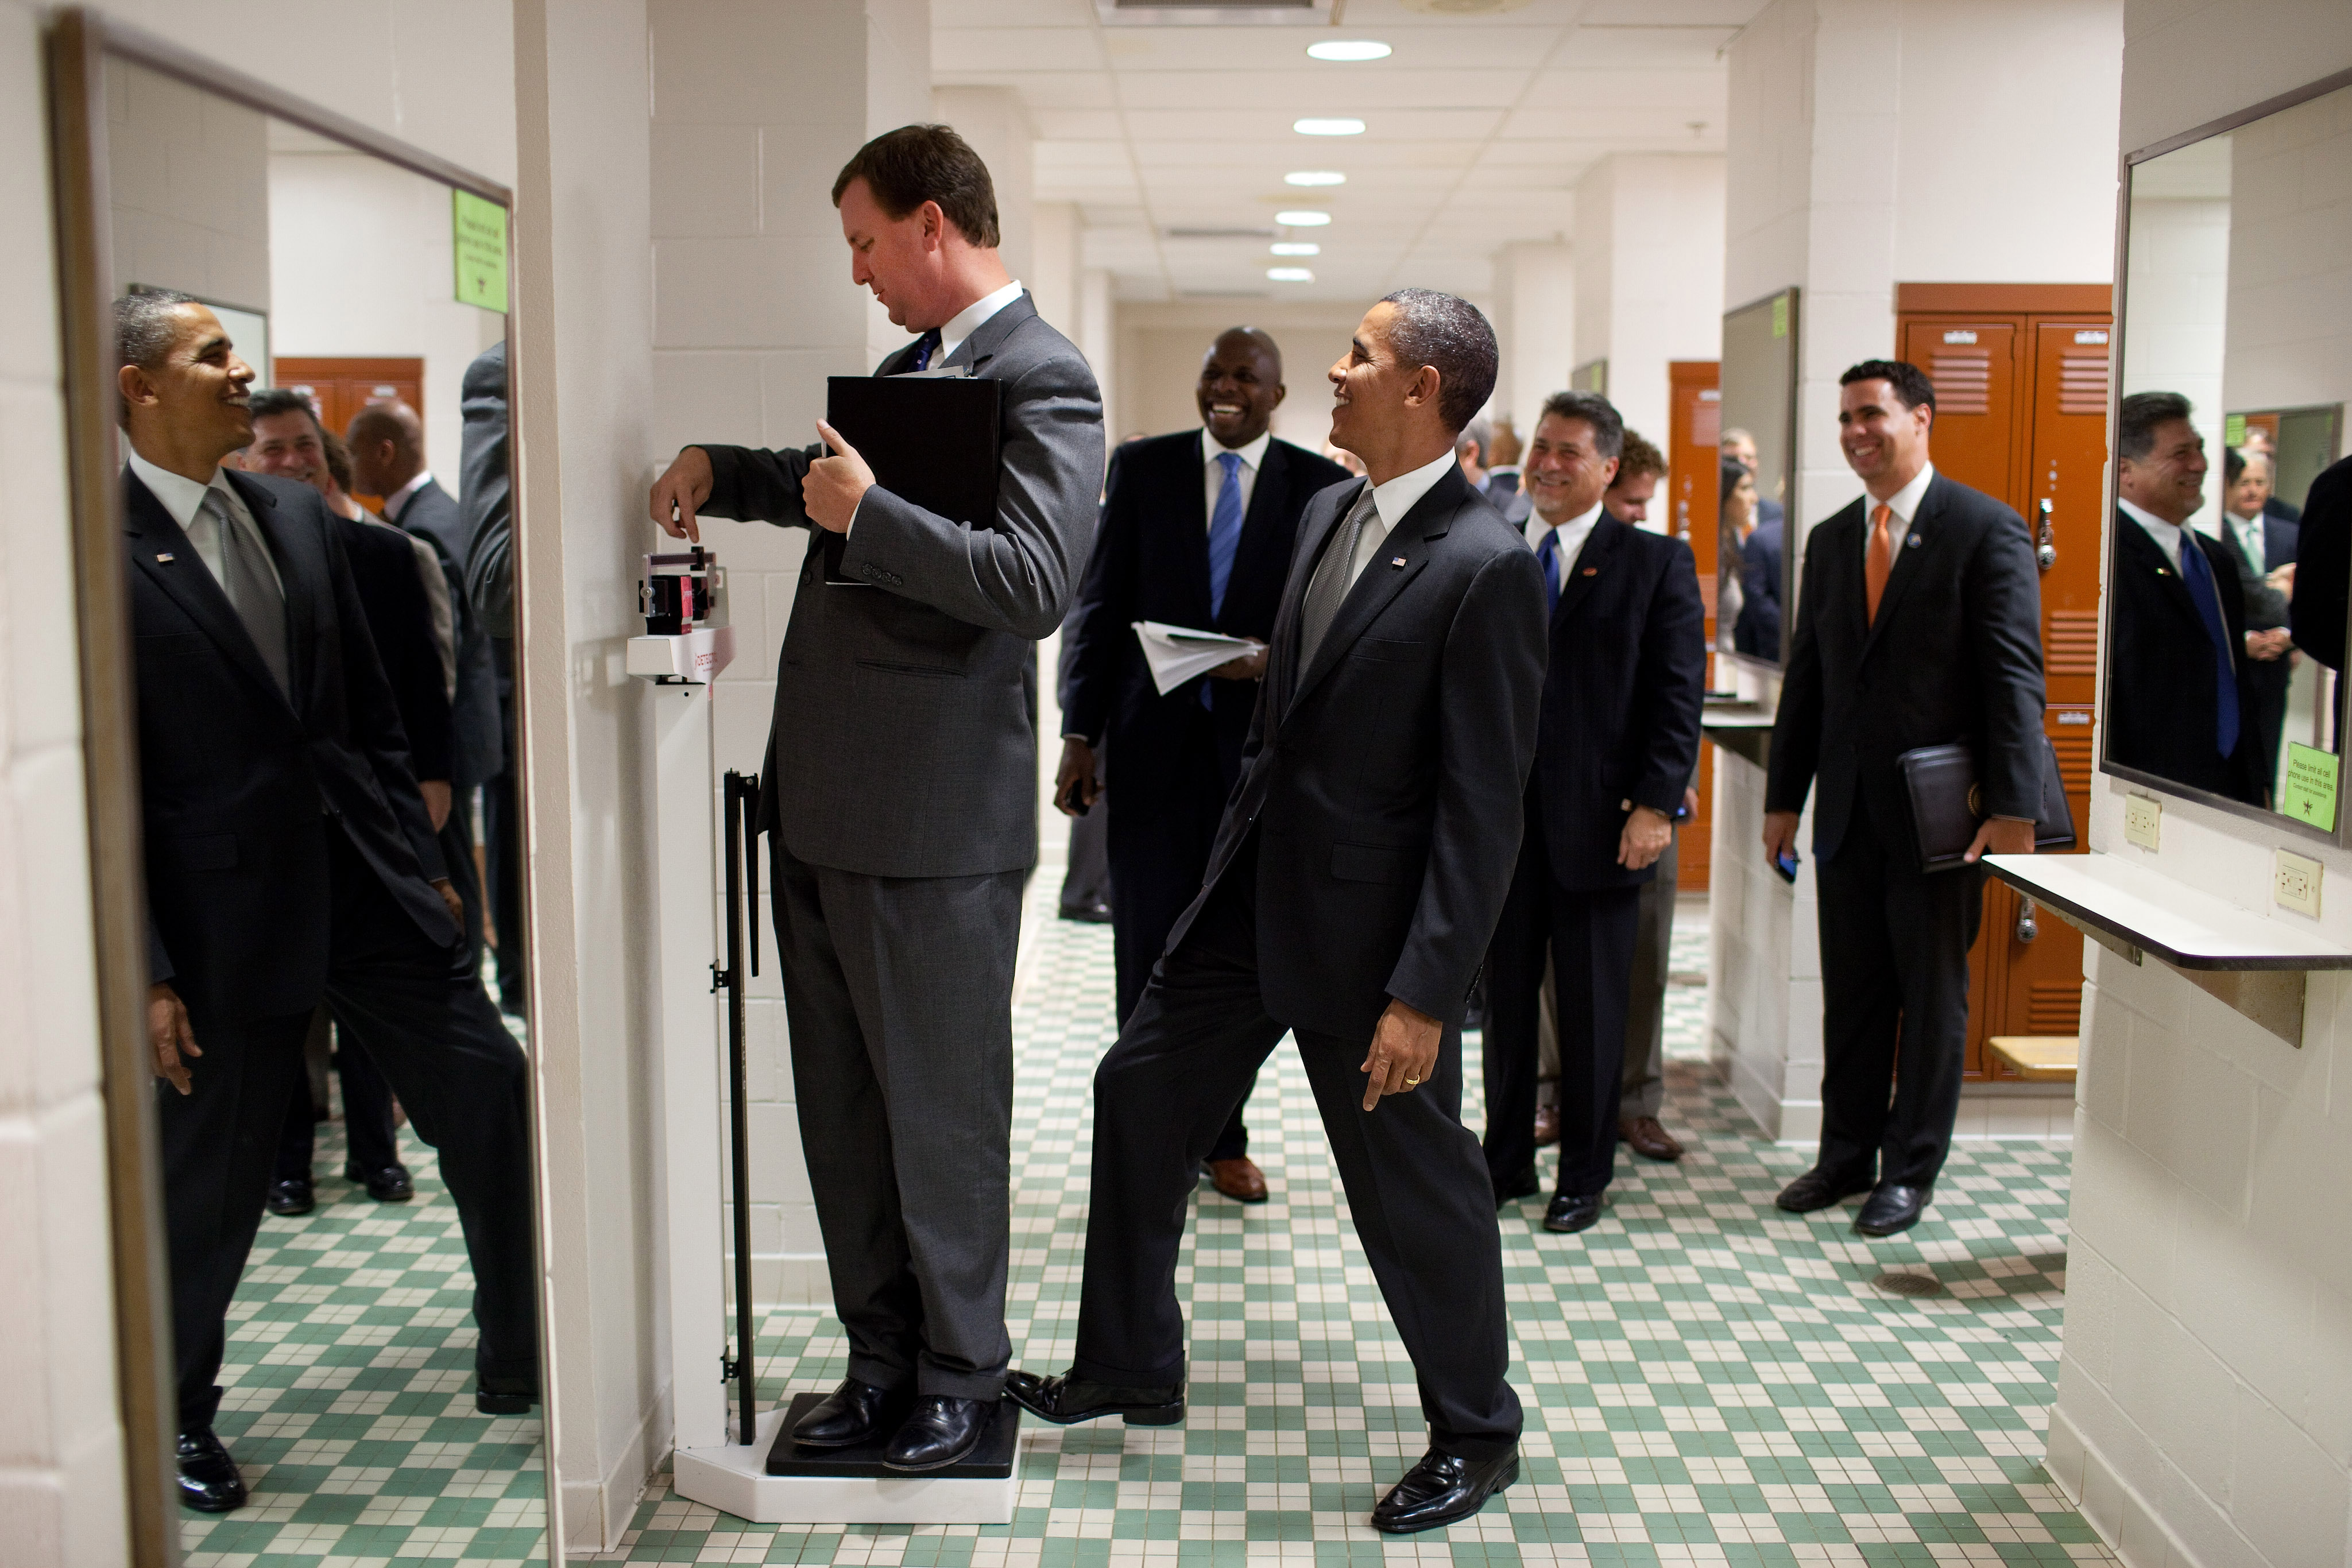

In [6]:
image_path = f"{image_path_prefix}/example_1.jpg"
image_content = Part.from_uri(uri=image_path, mime_type="image/jpeg")
display_image(image_path)

In [7]:
prompt = "Describe what is depicted on the image"
contents = [image_content, prompt]
generate(gemini_pro, contents)

President Barack Obama jokingly eyes up the weight of Governor-elect Terry
McAuliffe of Virginia, left, as he weighs in for the Governor's annual three-on-
three basketball game at St. Christopher's School in Richmond, Va., Nov. 7,
2013. (Official White House Photo by Pete Souza)

As we see the model was not able to pick the dynamics of the situation (the humor with which president Obama is joking). 

Let's change the prompt asking Gemini to add more details and see what happens.

In [8]:
prompt = """You are good at looking at pictures and uncovering the full story within a visual scene.
Your task is to provide a rich and insightful description of the image.

Key Points:
- Decipher the visual puzzle.
- Uncover hidden meanings.
- Navigate complex dynamics.
- Spotlight the heart of the matter.
- Craft a captivating narrative.

Remember:
- The most compelling descriptions not only capture what's visible but also hint at what lies beneath the surface.
- Try to recover hidden meaning from the scene, for example some hidden humor.
"""

# updated description with prompt changes
contents = [image_content, prompt]
generate(gemini_pro, contents)

In a seemingly mundane locker room, a tableau of power dynamics unfolds as
President Barack Obama, with a playful glint in his eye, bends down to check out
Governor Robert McDonnell's weight on a scale. McDonnell, holding a black folder
and seemingly caught off guard, endures the moment with a tight smile.   The
mirror's reflection reveals a chorus of reactions from the entourage.  Behind
McDonnell, a man with a wide grin appears to be enjoying the spectacle, while
another, partially obscured, seems to be stifling laughter. To Obama's left, a
man in a blue tie throws a knowing glance at the camera, as if acknowledging the
humor of the situation.   The stark white walls and institutional green-and-
white checkered floor contrast with the dark suits of the men, emphasizing the
staged nature of the event.  The presence of a "Please do not..." sign,
partially visible in the mirror, adds a touch of irony, hinting at the playful
transgression of norms.   This image, far from a simple depicti

After changing the prompt, the Gemini was able to capture **humor and playful interaction**. 

We followed a few tips when rewriting the prompt:

- Give a persona or a role to adopt (you are good at looking at pictures)
- Specify a mission or goal (your task is to provide rich description)
- Be specific about the instructions and structure them such as bullet points, prompt separators (markdown headers or XML tags)

# Prompt #2. Image Understanding: Using System instruction

System Instruction (SI) is an effective way to steer Gemini's behavior and shape how the model responds to your prompt. SI can be used to describe model behavior such as persona, goal, tasks to perform, output format / tone / style, any constraints etc. 

SI behaves more "sticky" (or consistent) during multi-turn behavior. For example, if you want to achieve a behavior that the model will consistently follow, then system instruction is the best way to put this instruction.

In [9]:
system_prompt = """You are good at looking at pictures and uncovering the full story within a visual scene.
Your task is to provide a rich and insightful description of the image.

Key Points:
- Decipher the visual puzzle.
- Uncover hidden meanings.
- Navigate complex dynamics.
- Spotlight the heart of the matter.
- Craft a captivating narrative.

Remember:
- The most compelling descriptions not only capture what's visible but also hint at what lies beneath the surface.
- Try to recover hidden meaning from the scene, for example some hidden humor.
"""

In [10]:
gemini_pro_si = GenerativeModel(
    model_name="gemini-1.5-pro-001", system_instruction=system_prompt
)
simple_prompt = "Describe what is depicted on the image"

contents = [image_content, simple_prompt]
generate(gemini_pro_si, contents)

The image captures a seemingly candid moment in a men's locker room, starring
none other than former President Barack Obama. The setting is somewhat
unexpected for a presidential appearance, but it's the dynamics of the scene
that truly bring a chuckle to the viewer.  In the foreground, a man in a suit –
presumably a member of Obama's staff – stands on a scale, his face hidden from
view as he focuses on the reading. His body language suggests a mix of
anticipation and perhaps a touch of self-consciousness.   Behind him, Obama
steals the show with a playful demeanor. He's caught mid-stride, leaning forward
as if sneaking a peek at the scale's display. His face wears a mischievous grin,
and his hand gestures – one finger pointing, the other seemingly holding back
laughter – speak volumes. It's as if he's about to let out a teasing remark,
adding a touch of lighthearted camaraderie to the moment.  The surrounding men,
likely other staff members and Secret Service agents, add another layer

# Prompt #3. Image Understanding: Structuring and order of images and texts

Gemini works well with images and text in any order.  For single-image prompts, starting with the image and then text may improve performance. If your prompt needs images and text mixed together, use the order that feels most natural.

That being said, this isn't a hard and fast rule, and your results may vary.  To illustrate, we've included examples of both image-first and text-first prompts below, and in this case there's no significant difference between the two.

In this example we achieved the same level of description as Prompt #1, but with using system instruction (or system prompt):

- Add the persona, instructions, and mission into system instruction
- Used the simple prompt as before in Prompt #1

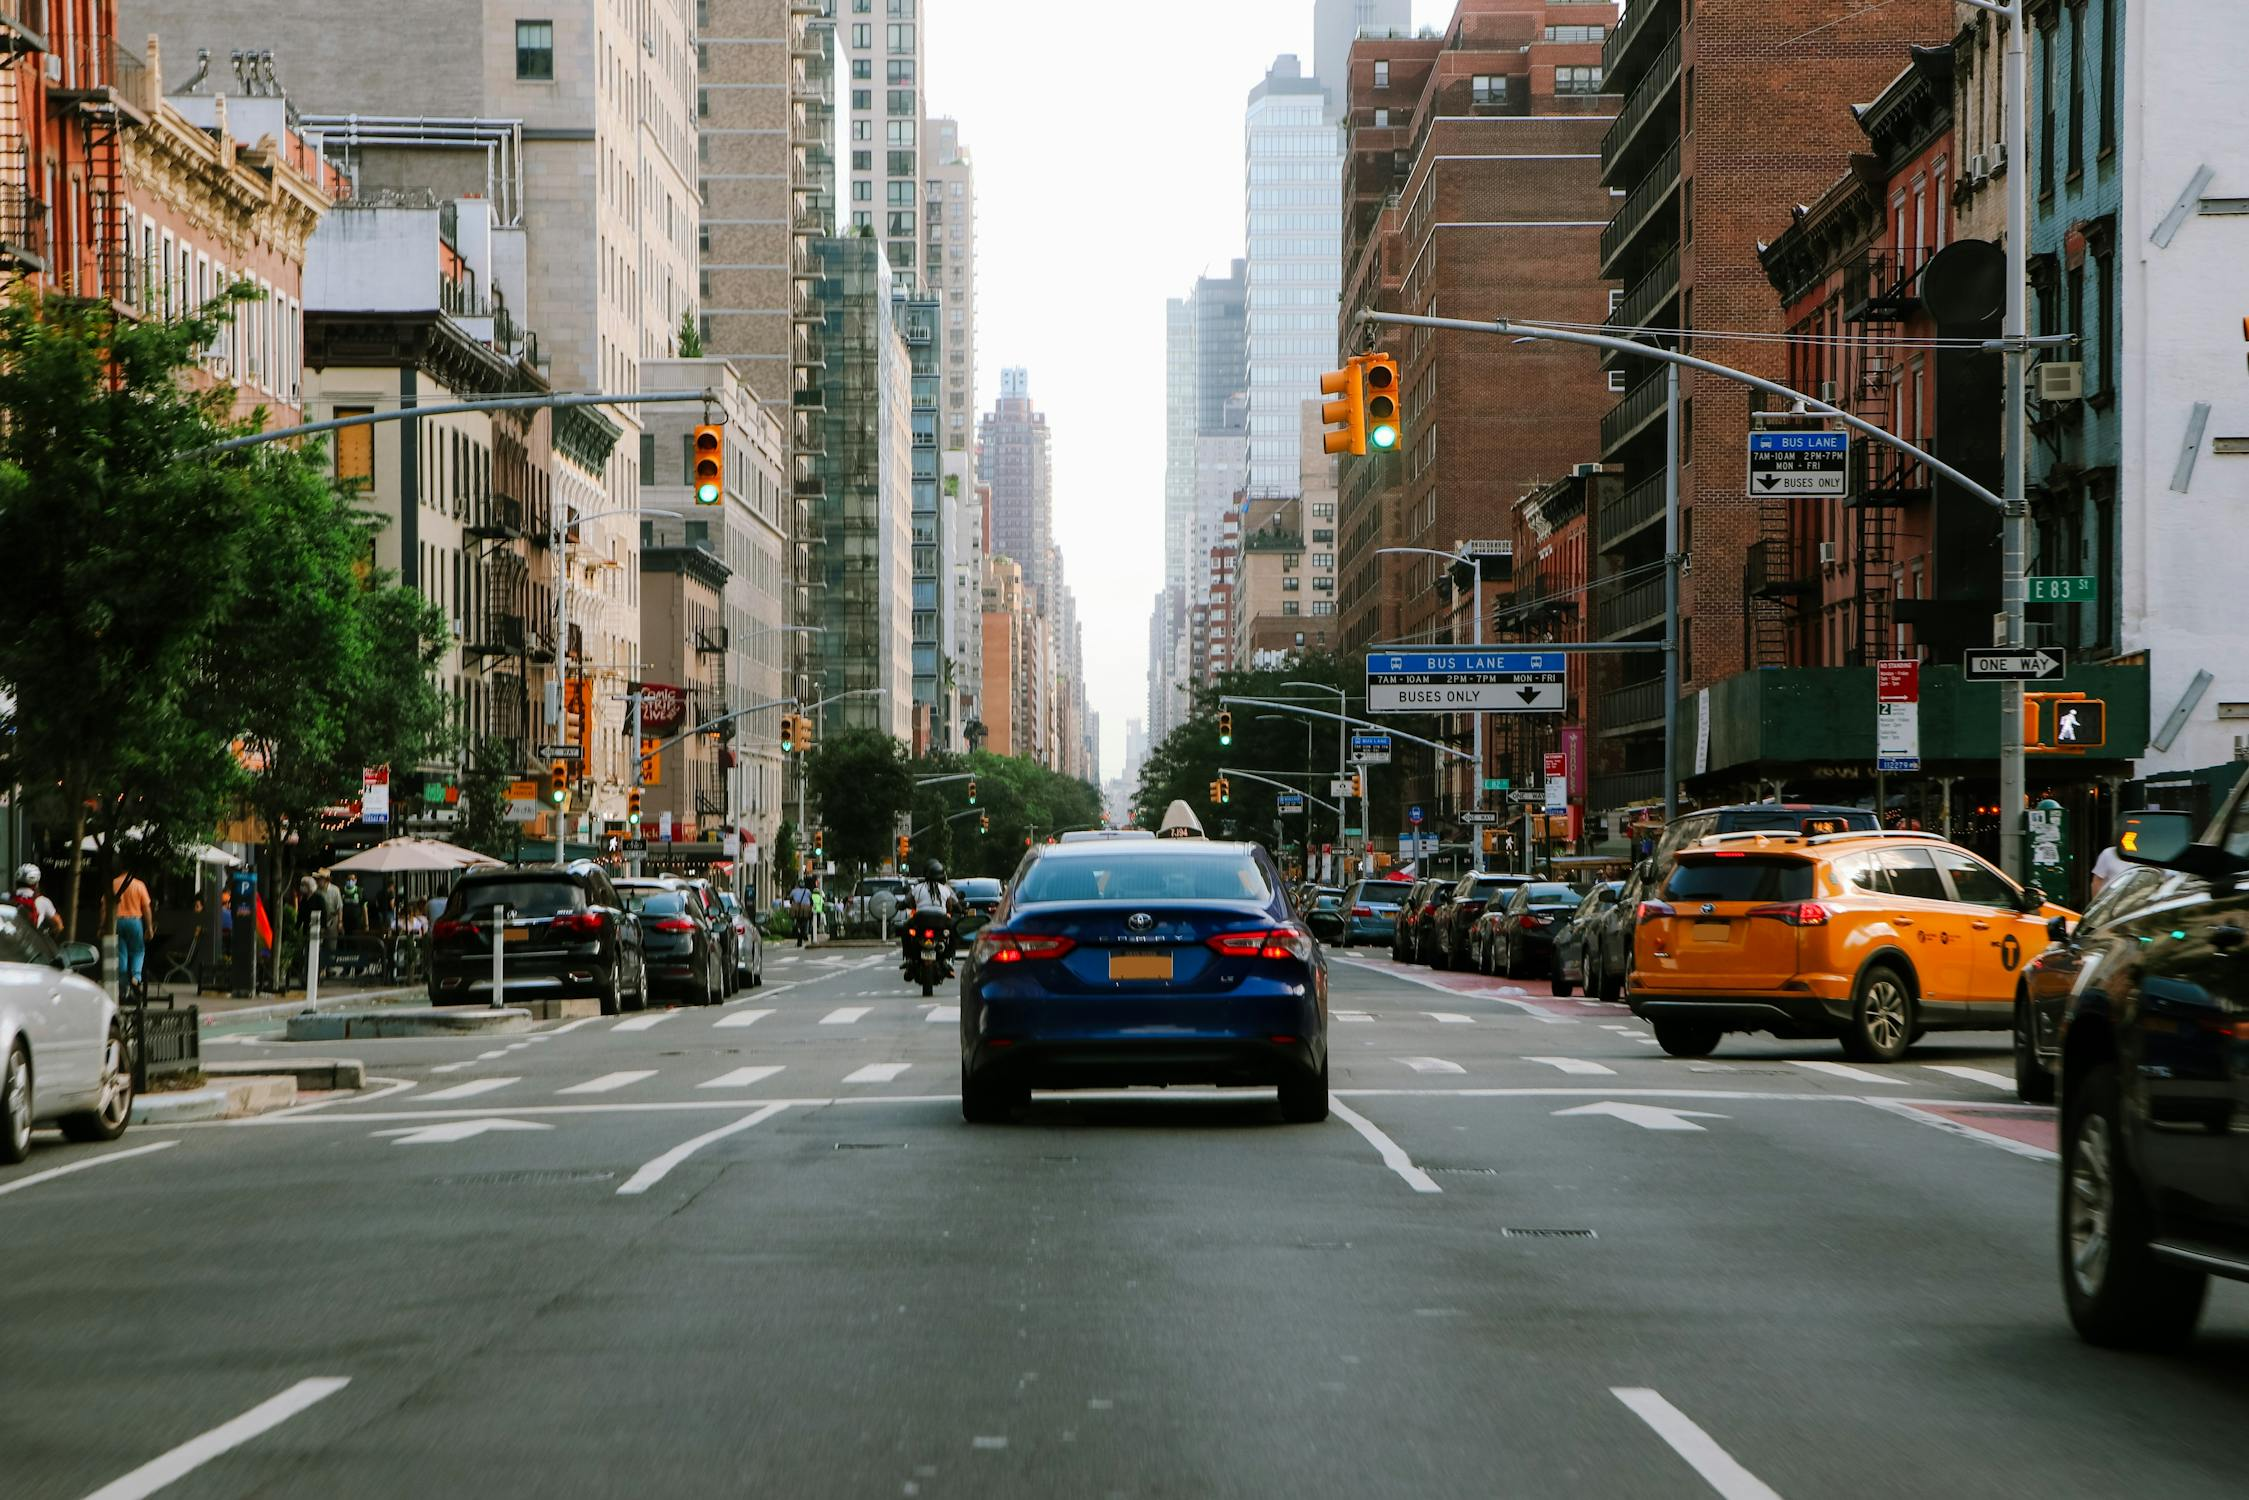

In [11]:
image_path = f"{image_path_prefix}/city_street.png"
image_content = Part.from_uri(uri=image_path, mime_type="image/png")
display_image(image_path)

Let's run with image first and then text in the prompt.

In [12]:
prompt_3 = (
    "Analyze the image and list the physical objects you can detect from the image."
)

contents = [image_content, prompt_3]
generate(gemini_flash, contents)

The image contains the following objects: - 11 cars - 2 traffic lights - 2
street signs - 2 buildings - 1 street - 1 crosswalk - 1 motorcycle - 1
pedestrian

Let's run with text first and then image in the prompt.

In [13]:
contents = [prompt_3, image_content]
generate(gemini_flash, contents)

The image contains the following objects: - Buildings - Street - Cars - Traffic
lights - Street signs - Trees - Sidewalk - People - Crosswalk - Lampposts - Fire
escape - Awnings - A motorcycle - A taxi - A bus stop sign - A street lamp - A
fire hydrant - A trash can - A bicycle - A streetlight - A crosswalk - A
sidewalk - A building - A tree - A car - A traffic light - A street sign - A
lamppost - A fire escape - Awnings - A motorcycle - A taxi - A bus stop sign - A
street lamp - A fire hydrant - A trash can - A bicycle - A streetlight - A
crosswalk - A sidewalk - A building - A tree - A car - A traffic light - A
street sign - A lamppost - A fire escape - Awnings - A motorcycle - A taxi - A
bus stop sign - A street lamp - A fire hydrant - A trash can - A bicycle - A
streetlight - A crosswalk - A sidewalk - A building - A tree - A car - A traffic
light - A street sign - A lamppost - A fire escape - Awnings - A motorcycle - A
taxi - A bus stop sign - A street lamp - A fire hydrant - A tr

From this particular example, we see better response with image-first-then-text compared to text-first-then-image. Your mileage may vary depending on the use case.

# Prompt #4. Image Understanding: Adding few-shot examples

You can add multiple images in the prompt that Gemini can use as examples to understand the output you want. Adding these few-shot examples can help the model identify the patterns and apply the relationship between the given images and responses to the new example. Let's examine how to use few-shot examples for the image understanding task. 

This prompt uses Gemini to count number of blocks in a image of Transformer architecture. To help the model, we add 3 images of different architectures - RNN, GRU and LSTM.

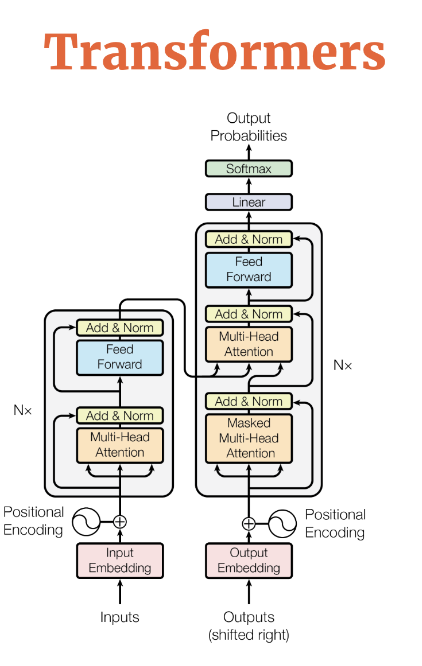

In [14]:
# Transformer architecture
# Image source: https://aiml.com/compare-the-different-sequence-models-rnn-lstm-gru-and-transformers/
display_image(f"{image_path_prefix}/example_5.png")

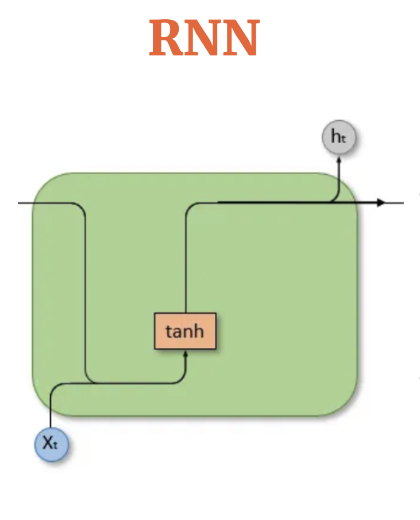

In [15]:
display_image(f"{image_path_prefix}/example_2.png")

To construct an effective prompt with examples, enumerate images such as `EXAMPLE# 1` in the below prompt.

Analyze the model architecture in the image and count the number of blocks. Use following examples as reference when analyzing the image and returning the response.
EXAMPLE# 1


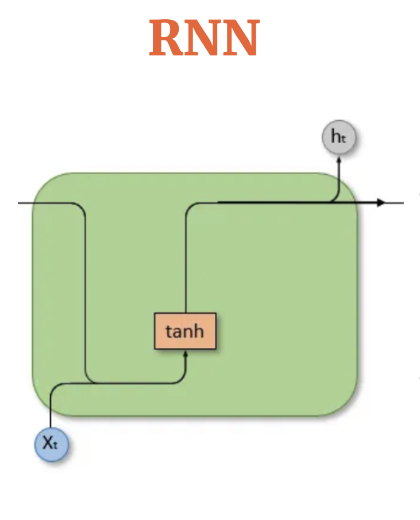

"response": {"name": "RNN", "number_of_blocks": 1}
EXAMPLE# 2


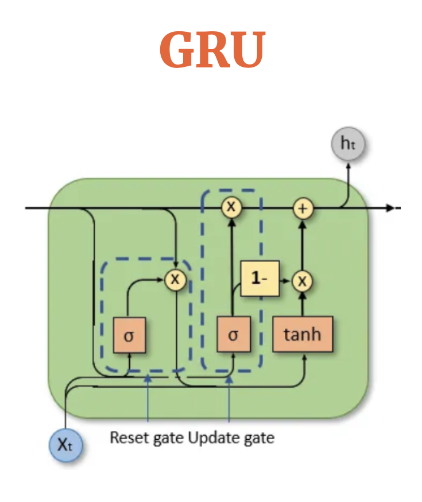

"response": {"name": "GRU", "number_of_blocks": 3}
EXAMPLE# 3


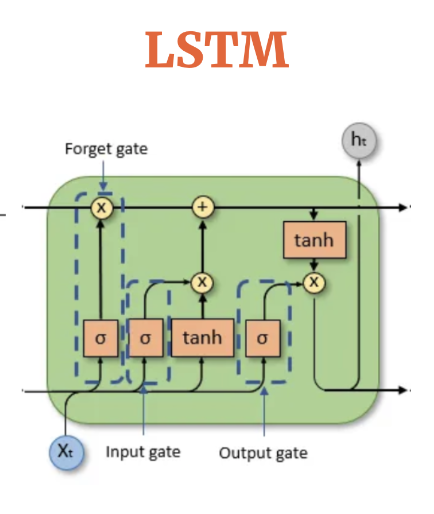

"response": {"name": "LSTM", "number_of_blocks": 5}
ARCHITECTURE:


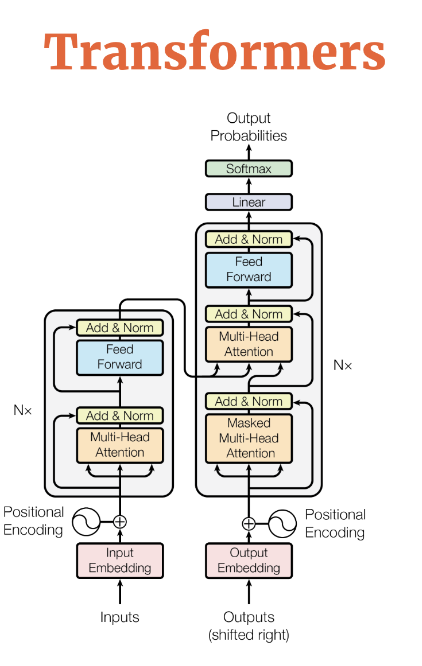

"response":


In [16]:
prompt_4 = "Analyze the model architecture in the image and count the number of blocks. Use following examples as reference when analyzing the image and returning the response."
image_content = Part.from_uri(
    uri=f"{image_path_prefix}/example_5.png", mime_type="image/png"
)

contents = [
    prompt_4,
    "EXAMPLE# 1",
    Part.from_uri(uri=f"{image_path_prefix}/example_2.png", mime_type="image/png"),
    '"response": {"name": "RNN", "number_of_blocks": 1}',
    "EXAMPLE# 2",
    Part.from_uri(uri=f"{image_path_prefix}/example_3.png", mime_type="image/png"),
    '"response": {"name": "GRU", "number_of_blocks": 3}',
    "EXAMPLE# 3",
    Part.from_uri(uri=f"{image_path_prefix}/example_4.png", mime_type="image/png"),
    '"response": {"name": "LSTM", "number_of_blocks": 5}',
    "ARCHITECTURE:",
    image_content,
    '"response":',
]

print_prompt(contents)

In [17]:
generate(
    gemini_pro,
    contents,
    generation_config=dict(**GENERATION_CONFIG, response_mime_type="application/json"),
)

{"name": "Transformer", "number_of_blocks": 10}

# Prompt #5. Document understanding

Let's examine the task of document understanding using Gemini.

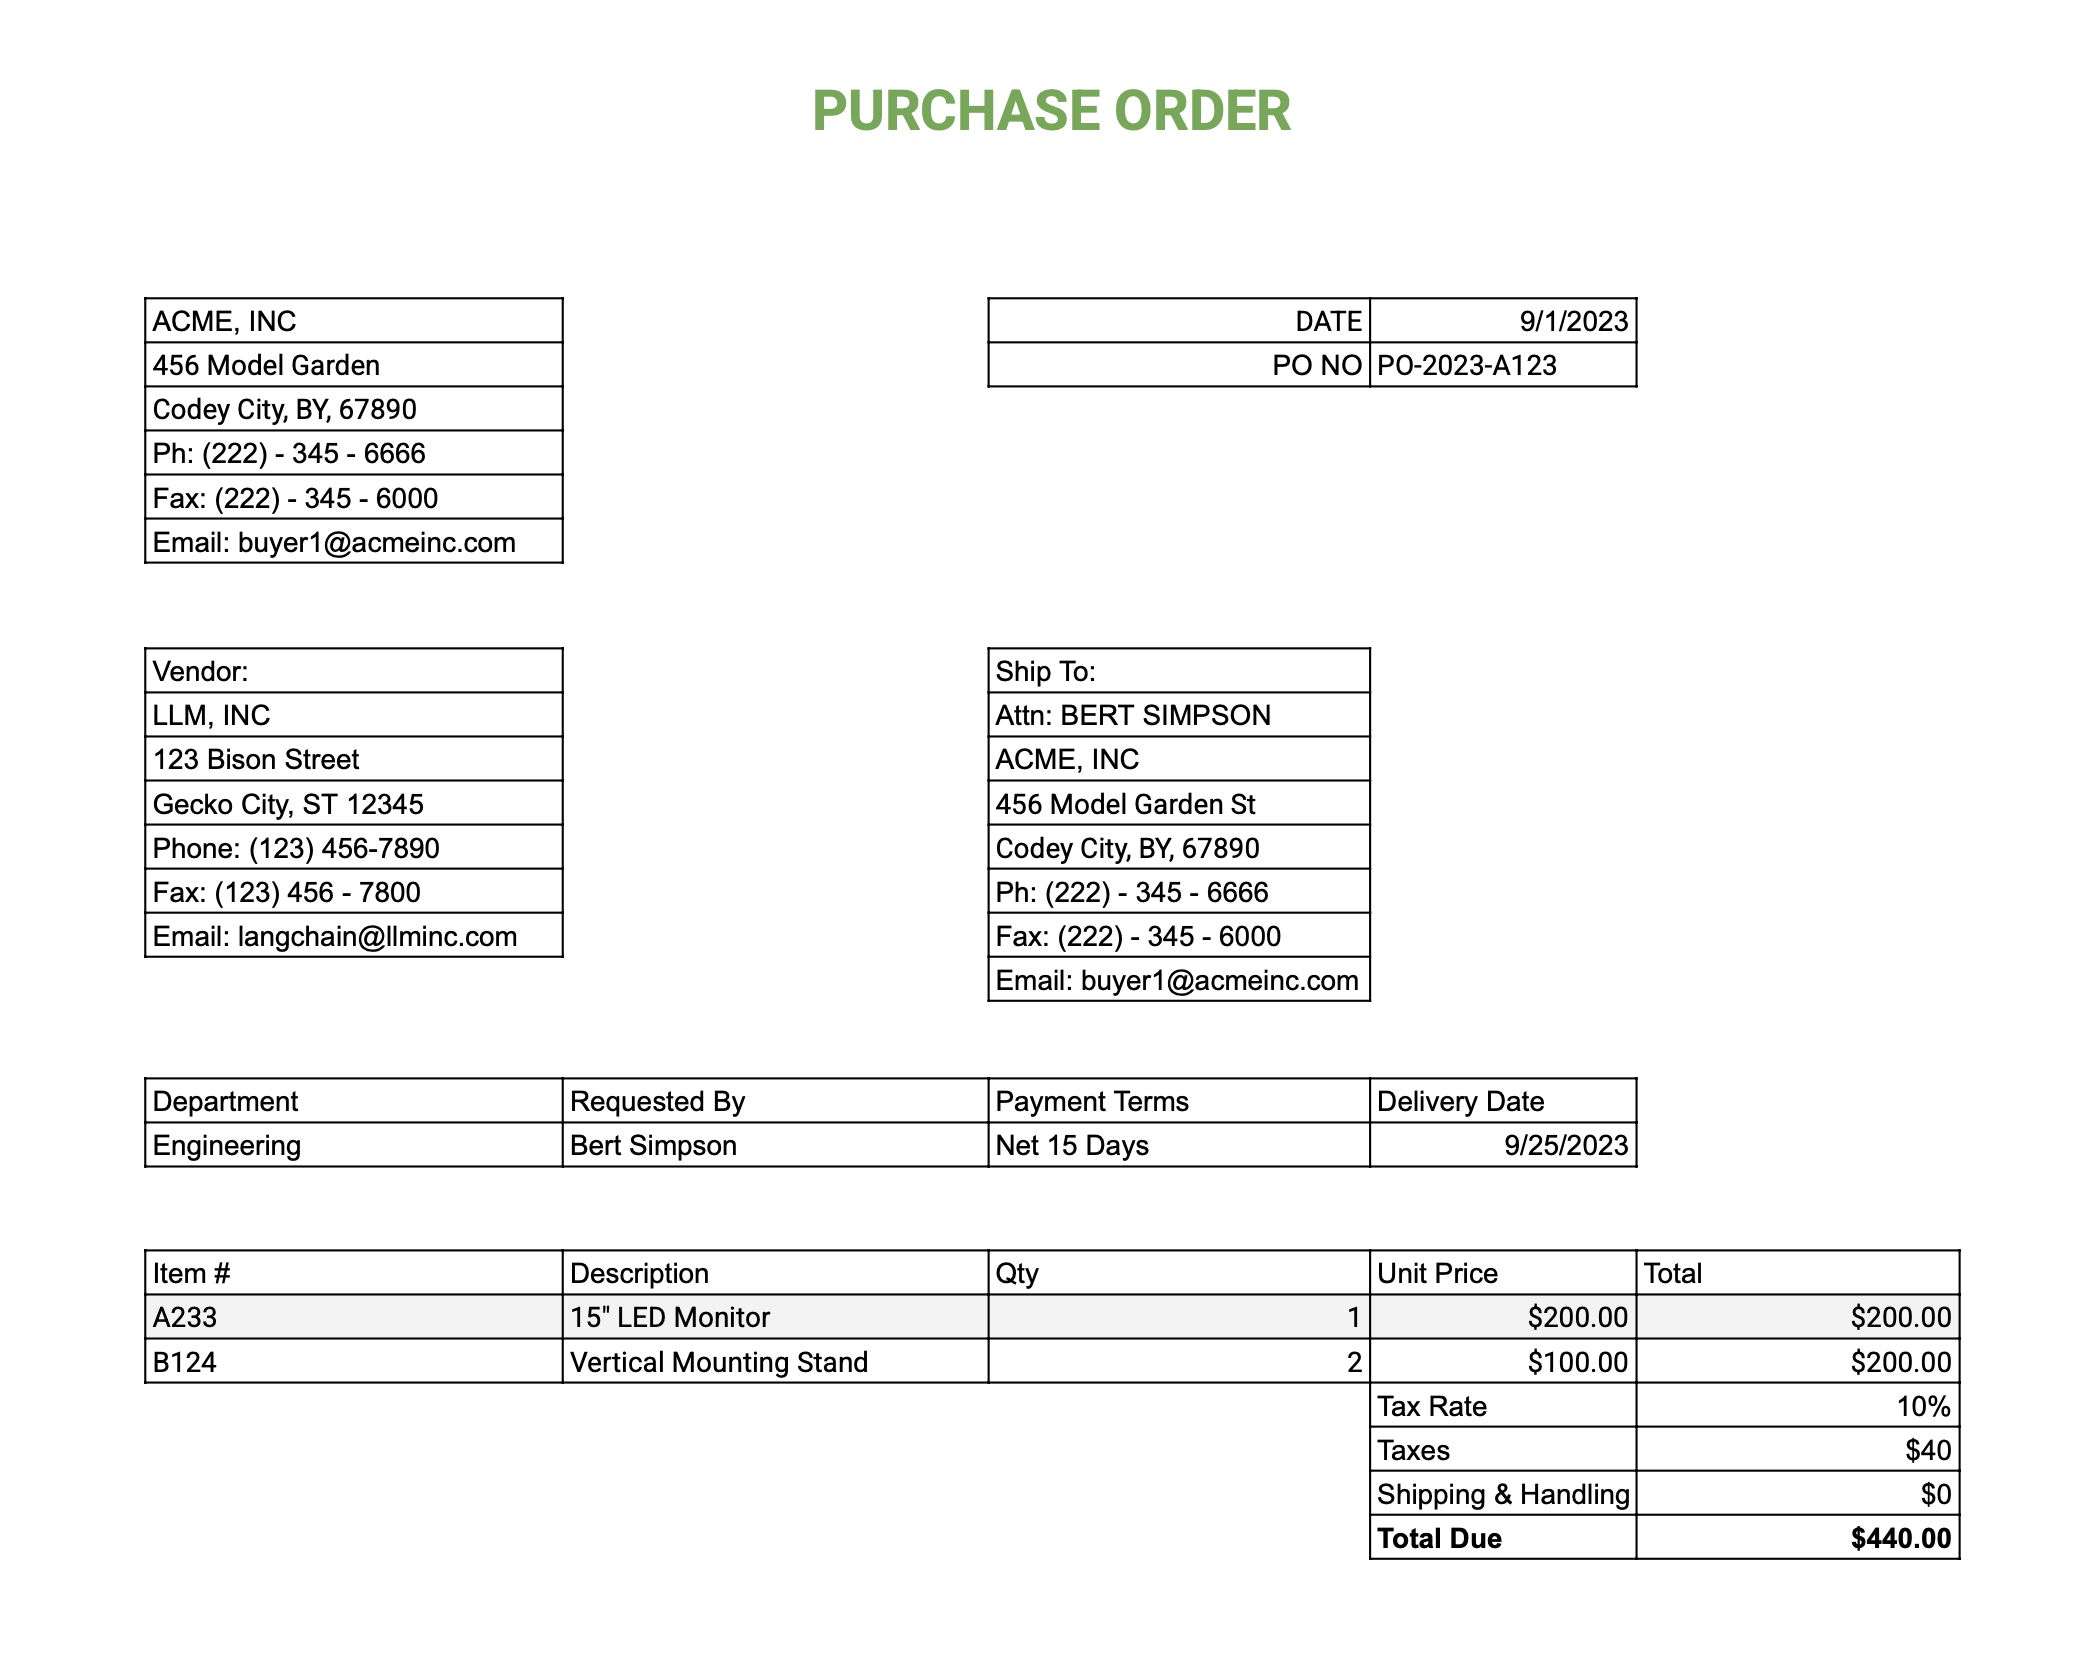

In [18]:
image_path = f"{image_path_prefix}/order_1.png"
image_content = Part.from_uri(uri=image_path, mime_type="image/png")
display_image(image_path)

In [19]:
prompt_5 = "Describe the image"

contents = [image_content, prompt_5]
generate(gemini_pro, contents, as_markdown=True)

The image is a Purchase Order from ACME, INC to LLM, INC for a 15" LED Monitor and a Vertical Mounting Stand. The total amount due is $440.00. 

Here's a breakdown of the Purchase Order:

**ACME, INC (Buyer)**
* **Address:** 456 Model Garden, Codey City, BY, 67890
* **Phone:** (222) - 345 - 6666
* **Fax:** (222) - 345 - 6000
* **Email:** buyer1@acmeinc.com

**LLM, INC (Vendor/Seller)**
* **Address:** 123 Bison Street, Gecko City, ST 12345
* **Phone:** (123) 456-7890
* **Fax:** (123) 456 - 7800
* **Email:** langchain@llminc.com

**Purchase Order Details**
* **Date:** 9/1/2023
* **PO Number:** PO-2023-A123
* **Ship To:** 
    * Attn: BERT SIMPSON
    * ACME, INC
    * 456 Model Garden St
    * Codey City, BY, 67890
    * Ph: (222) - 345 - 6666
    * Fax: (222) - 345 - 6000
    * Email: buyer1@acmeinc.com
* **Department:** Engineering
* **Requested By:** Bert Simpson
* **Payment Terms:** Net 15 Days
* **Delivery Date:** 9/25/2023

**Order Items**
* **Item # A233:** 15" LED Monitor - **Qty:** 1 - **Unit Price:** $200.00 - **Total:** $200.00
* **Item # B124:** Vertical Mounting Stand - **Qty:** 2 - **Unit Price:** $100.00 - **Total:** $200.00

**Order Summary**
* **Subtotal:** $400.00
* **Tax Rate:** 10%
* **Taxes:** $40.00
* **Shipping & Handling:** $0.00
* **Total Due:** $440.00 


As we see, the model successfully extracted main information, but it did not pick up all values from the table. Let's fix that with the same approach we used for task 1.

In [20]:
system_prompt_5 = """You are an expert at document understanding and highly 
capable of extracting all relevant information from bills, receipts, and 
various documents.

Your task is to process the given document and identify all pertinent details 
such as the vendor/merchant name, date, transaction details (items, quantities, 
prices, etc.), total amount, payment method, and any other noteworthy information.

# INSTRUCTIONS
- Analyze Document Structure
- Identify Key Sections
- Extract Data:
  - Vendor/Merchant Name
  - Date
  - Transaction Details:
    - Items
    - Quantities
    - Prices
    - Subtotals
    - Total Amount
    - Payment Method
   - Other Information
- Present the extracted information in a clear and structured format, using appropriate headings and labels.

# CONSTRAINTS:
- Handle Variations
- Prioritize Accuracy
- Handle Ambiguity
- Maintain Confidentiality"""

In [21]:
gemini_pro_si = GenerativeModel(
    model_name="gemini-1.5-pro-001", system_instruction=system_prompt_5
)
contents = [image_content, "DOCUMENT:"]
generate(gemini_pro_si, contents, as_markdown=True)

## Purchase Order Summary

**Vendor/Merchant:** LLM, INC
  * Address: 123 Bison Street, Gecko City, ST 12345
  * Phone: (123) 456-7890
  * Fax: (123) 456 - 7800
  * Email: langchain@llminc.com

**Purchaser/Client:** ACME, INC
  * Address: 456 Model Garden, Codey City, BY, 67890
  * Phone: (222) - 345 - 6666
  * Fax: (222) - 345 - 6000
  * Email: buyer1@acmeinc.com

**Order Details:**
  * Date: 9/1/2023
  * PO Number: PO-2023-A123
  * Department: Engineering
  * Requested By: Bert Simpson
  * Ship To: 
    * Attn: BERT SIMPSON
    * Address: 456 Model Garden St, Codey City, BY, 67890

**Payment Terms:** Net 15 Days
**Delivery Date:** 9/25/2023

**Transaction Details:**

| Item # | Description | Qty | Unit Price | Total |
|---|---|---|---|---|
| A233 | 15" LED Monitor | 1 | $200.00 | $200.00 |
| B124 | Vertical Mounting Stand | 2 | $100.00 | $200.00 |
|  | **Tax Rate** |  |  | 10% |
|  | **Taxes** |  |  | $40.00 |
|  | **Shipping & Handling** |  |  | $0.00 |
|  | **Total Due** |  |  | **$440.00** | 


As we see with the modification of the prompt and adding task in the system instruction, the model was able to extract the entities from the table in the way we wanted to do it.

# Prompt #6. Math Understanding

In this prompt, let's examine Gemini's capabilities of math understanding by uploading a screenshot of a math problem and solve with Gemini.

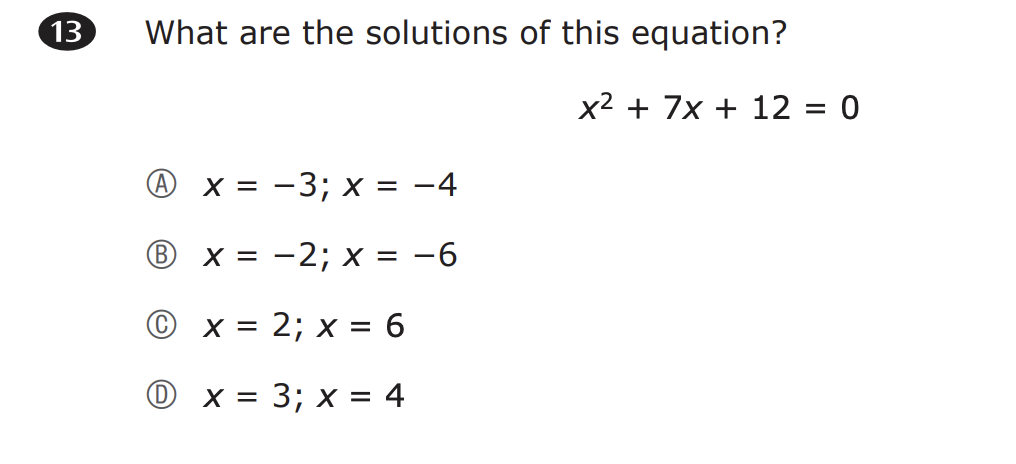

In [22]:
image_path = f"{image_path_prefix}/math_1.png"
image_content = Part.from_uri(uri=image_path, mime_type="image/png")
display_image(image_path)

In [23]:
prompt_6 = "Solve the mathematical problem"

contents = [image_content, prompt_6]
generate(gemini_pro, contents, as_markdown=True)

The correct answer is **A x = −3; x = −4**. Here's how to solve it:

**Factoring**

* **Find two numbers that add up to 7 (the coefficient of the x term) and multiply to 12 (the constant term).**  The numbers 3 and 4 satisfy these conditions.
* **Factor the equation:** (x + 3)(x + 4) = 0
* **Set each factor equal to zero and solve for x:**
    * x + 3 = 0  -->  x = -3
    * x + 4 = 0  -->  x = -4

**Therefore, the solutions to the equation x² + 7x + 12 = 0 are x = -3 and x = -4.** 


Let's now switch to a different problem and update the prompt with better instructions.

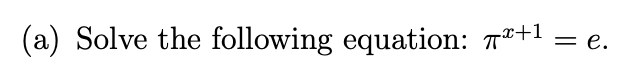

In [24]:
image_path = f"{image_path_prefix}/math_2.png"
image_content = Part.from_uri(uri=image_path, mime_type="image/png")
display_image(image_path)

In [25]:
prompt_6 = """Please provide a detailed, step-by-step solution, clearly 
outlining the reasoning behind each step. Show all intermediate results and 
calculations, ensuring a comprehensive and easy-to-follow explanation.

If the equation involves any specific mathematical concepts or techniques, 
please identify and explain them as part of the solution.

If there are multiple solutions or special cases, please address them comprehensively.

Finally, present the final answer or answers in a clear and concise manner. """

contents = [image_content, prompt_6]
generate(gemini_pro, contents, as_markdown=True)

(a) **Understanding the Problem**

We need to solve the exponential equation: 

  π^(x+1) = e

This means finding the value(s) of 'x' that make the equation true.

**Solution**

1. **Using Logarithms:**  Since we have an unknown exponent, logarithms are the natural tool to use. We can take the natural logarithm (ln) of both sides:

   ln(π^(x+1)) = ln(e)

2. **Applying Logarithm Properties:**  Recall the following logarithm property: ln(a^b) = b * ln(a). Applying this to our equation:

   (x+1) * ln(π) = ln(e)

3. **Simplifying:** Remember that ln(e) = 1.  Substituting this in:

   (x+1) * ln(π) = 1

4. **Isolating 'x':**  To solve for 'x', follow these steps:

   * Divide both sides by ln(π): 
      x + 1 = 1 / ln(π)
   * Subtract 1 from both sides:
      x = (1 / ln(π)) - 1

**Final Answer**

The solution to the equation π^(x+1) = e is:

x = (1 / ln(π)) - 1 


Here we ask Gemini to use step-by-step reasoning and ask it to output intermediate steps also. This allows us to be more confident in the output answer. Asking the model to return reasoning and intermediate steps helps LLM to arrive at the answer better.

# Conclusion

This demonstrated various examples of working with Gemini using images. Following are general prompting strategies when working with Gemini on multimodal prompts, that can help achieve better performance from Gemini:

1. Craft clear and concise instructions.
1. Add your image first for single-image prompts.
1. Add few-shot examples to the prompt to show the model how you want the task done and the expected output.
1. Break down the task step-by-step.
1. Specify the output format.
1. Ask Gemini to include reasoning in its response along with decision or scores
1. Use context caching for repeated queries.

Specifically, when working with images following may help:

1. Enumerate when prompt has multiple images.
1. Use a single image for optimal text detection.
1. You can detect objects in images with bounding boxes.
1. Guiding models’ attention by adding hints.
1. Ask for detailed analysis for optimizing output.